── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.5     ✔ dplyr   1.0.3
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse



── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double()
)
ℹ Use `spec()` for the full column specifications.



── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double()
)
ℹ Use `spec()` for the full column specifications.




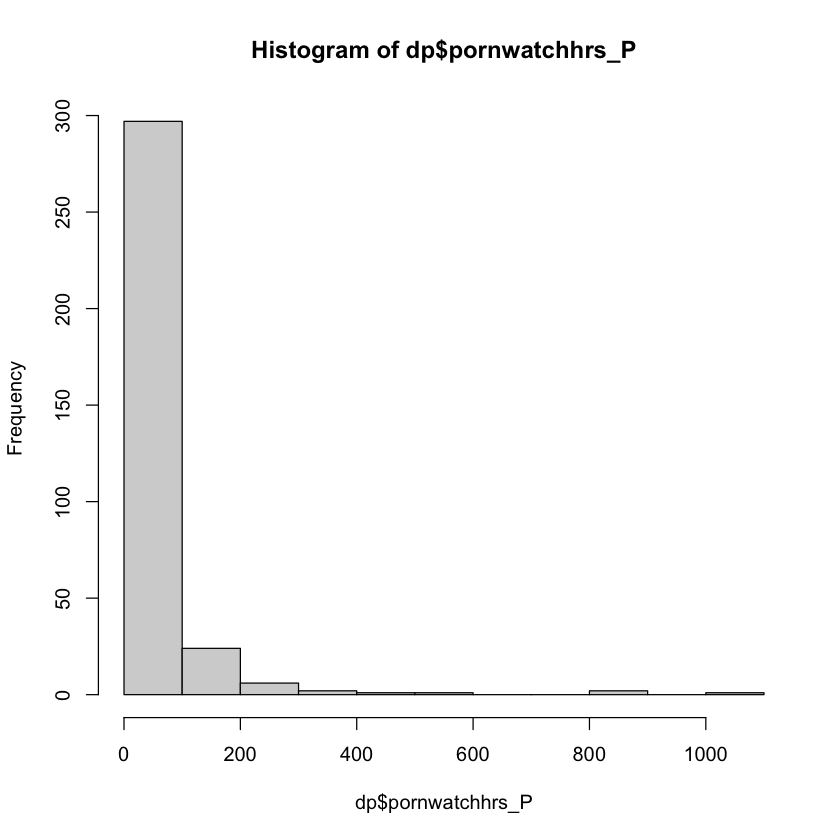

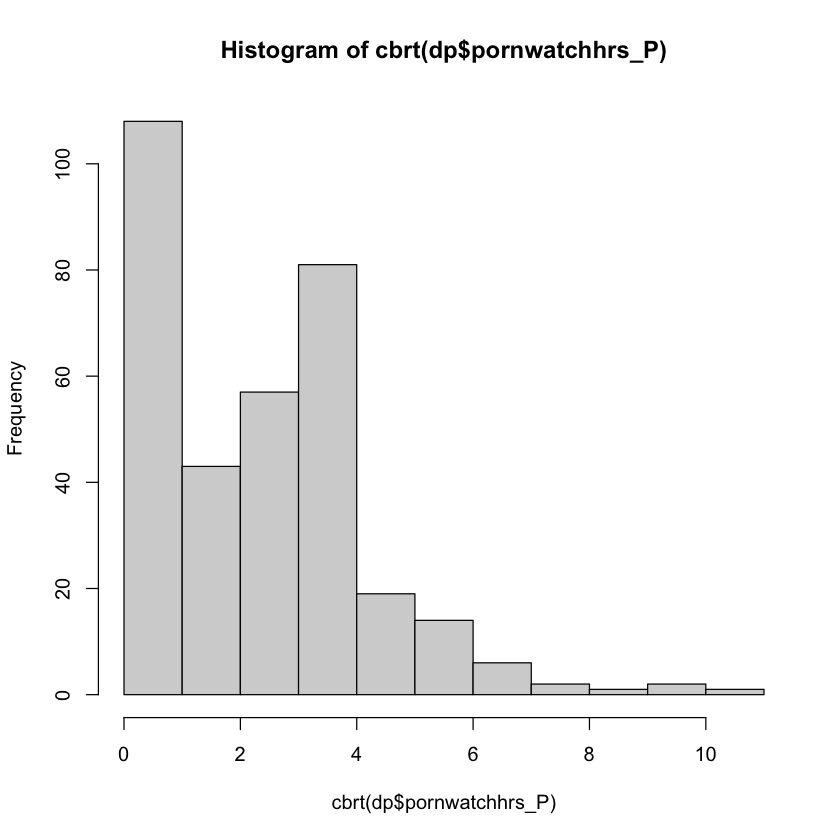

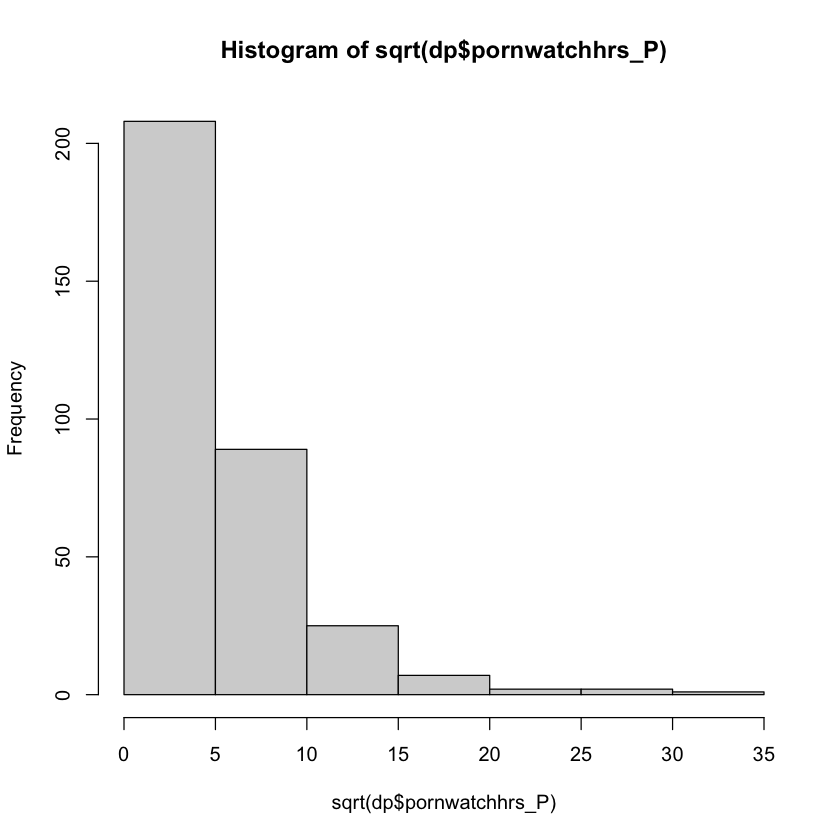

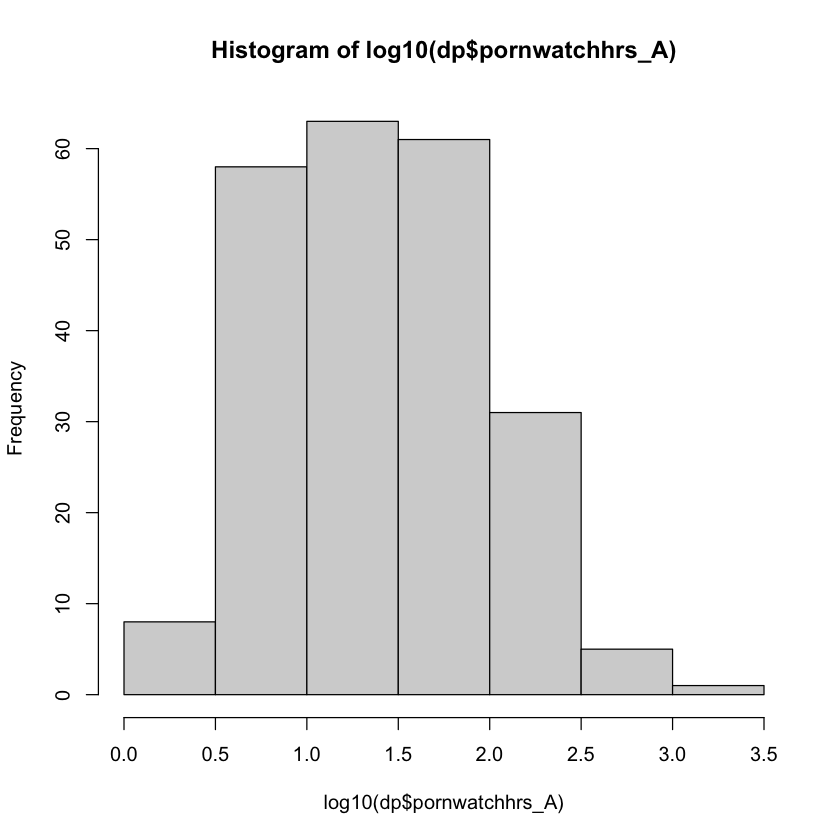

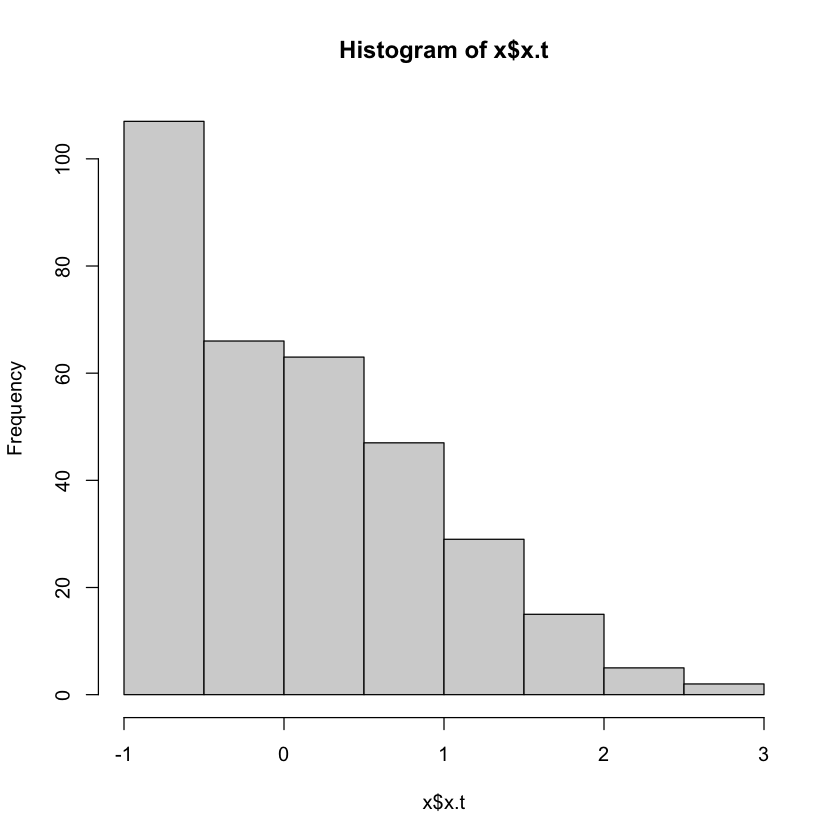

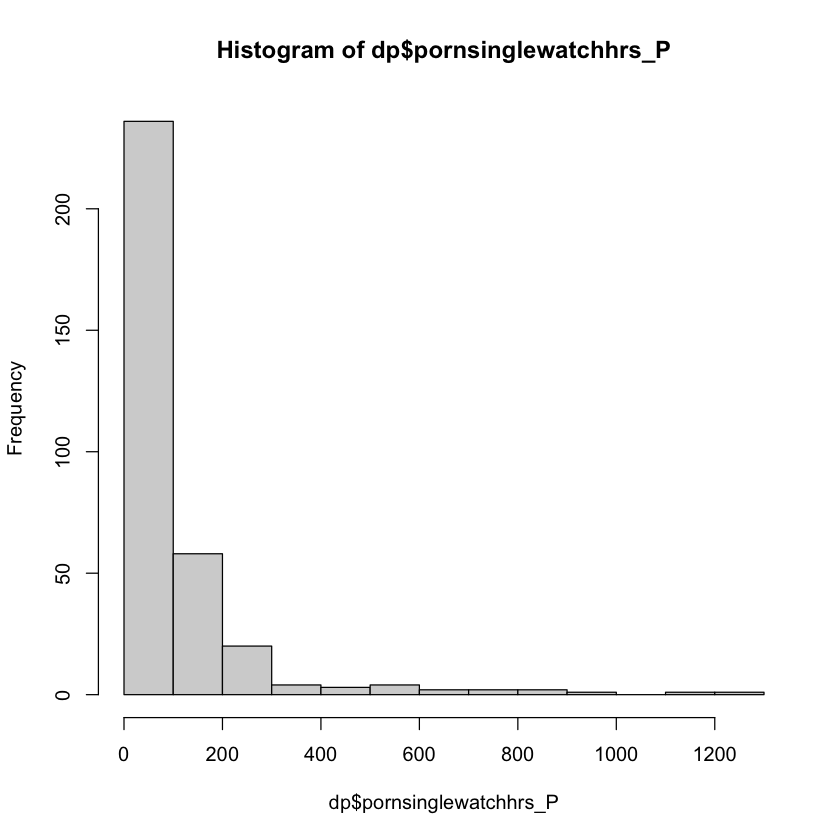

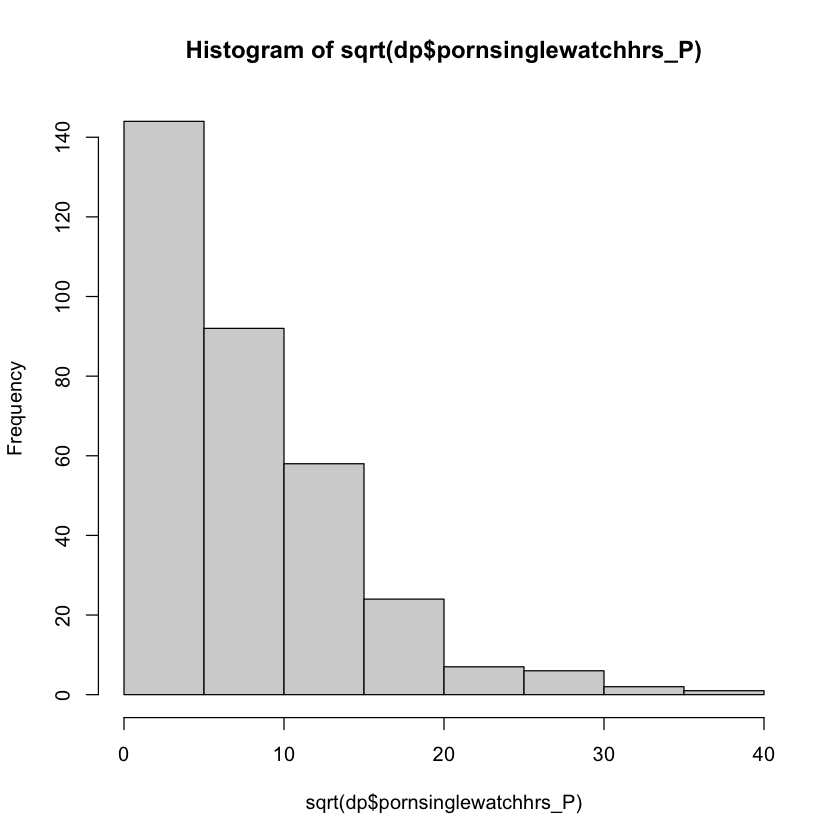

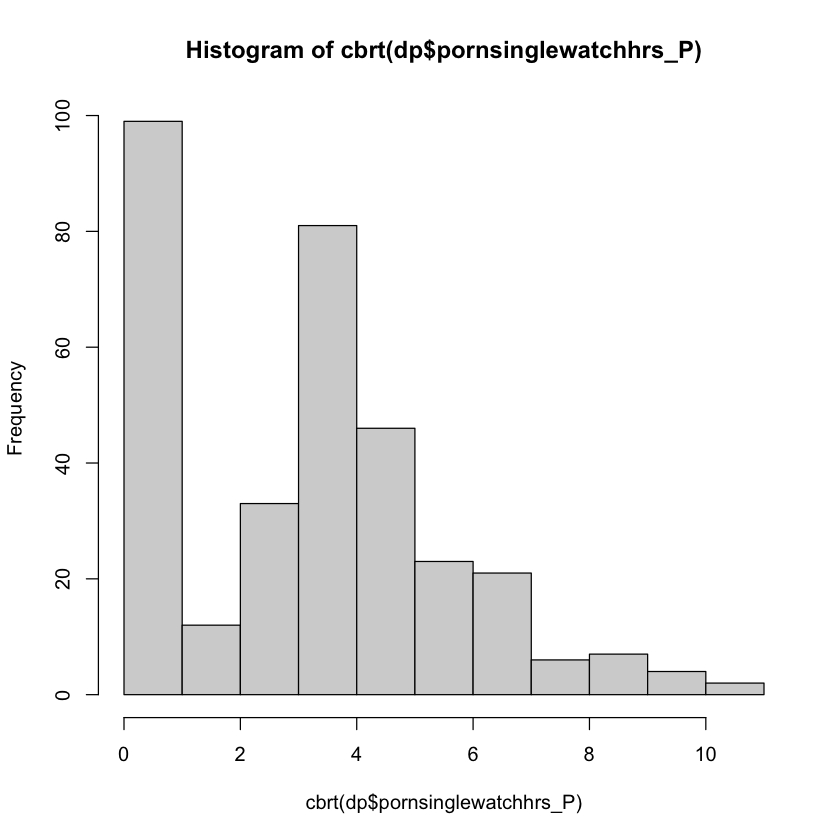

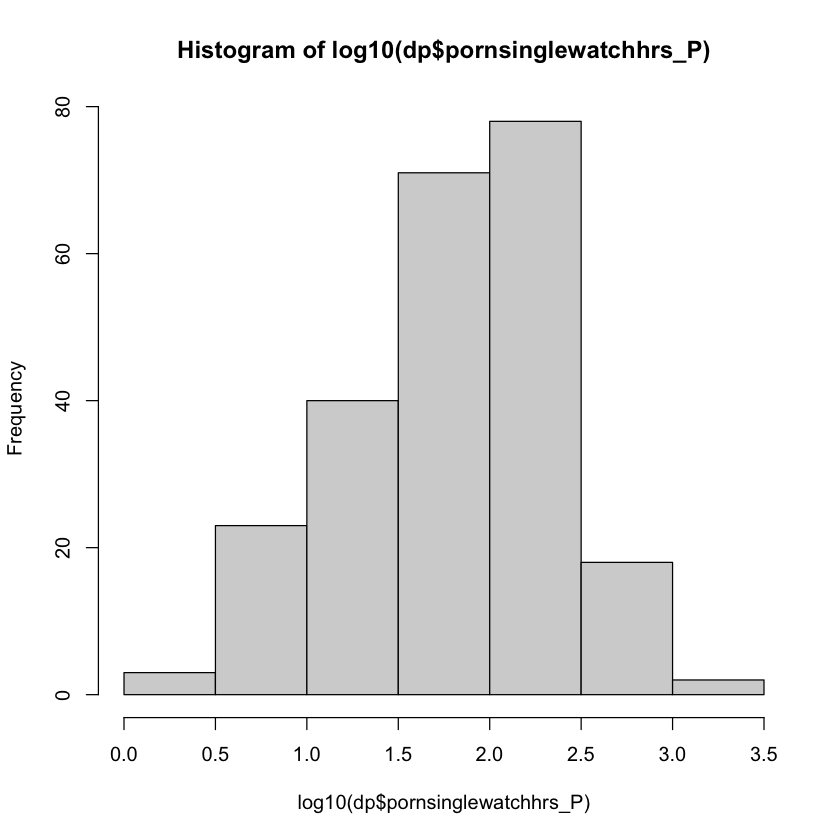

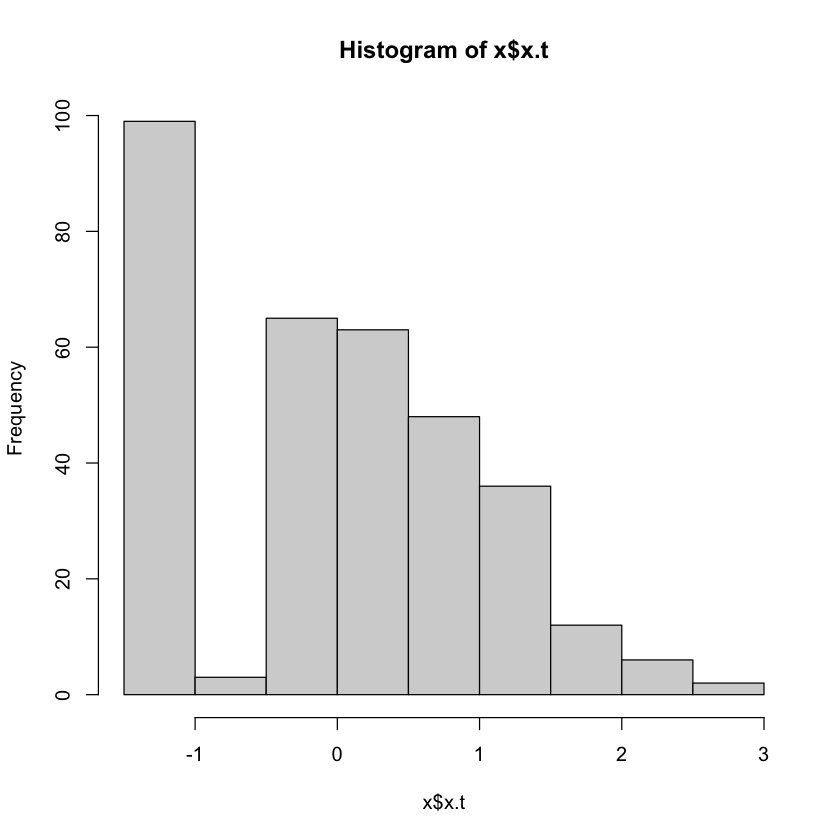

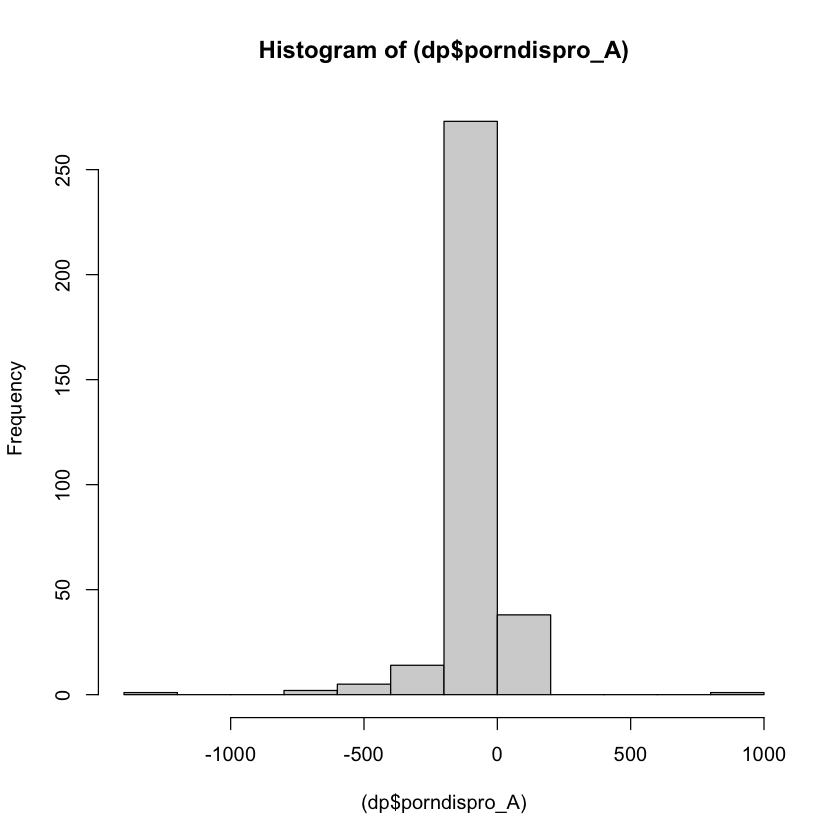

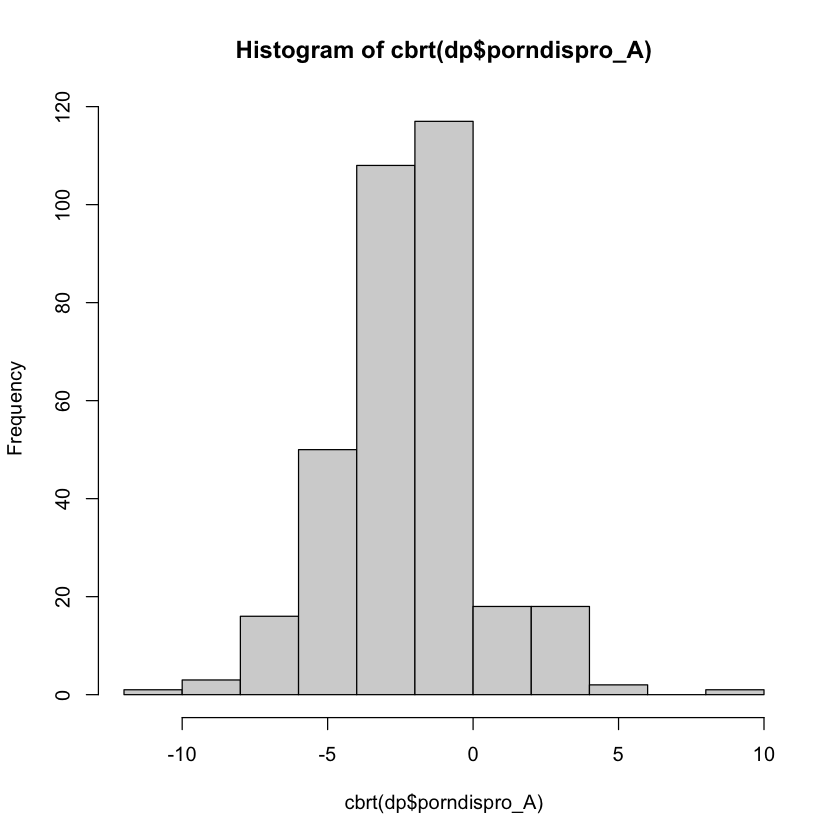

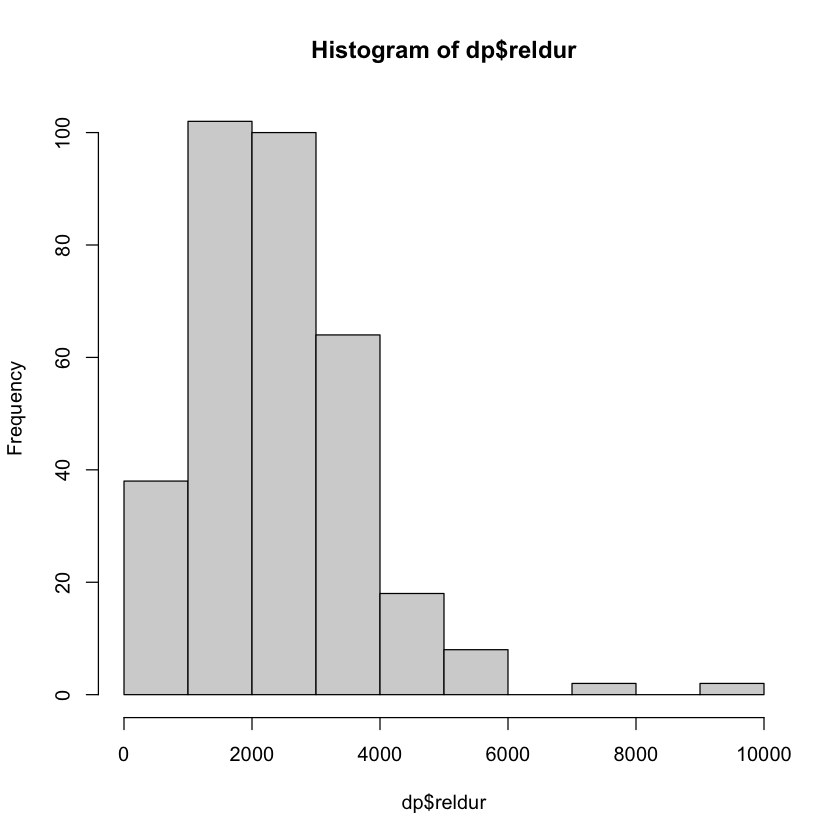

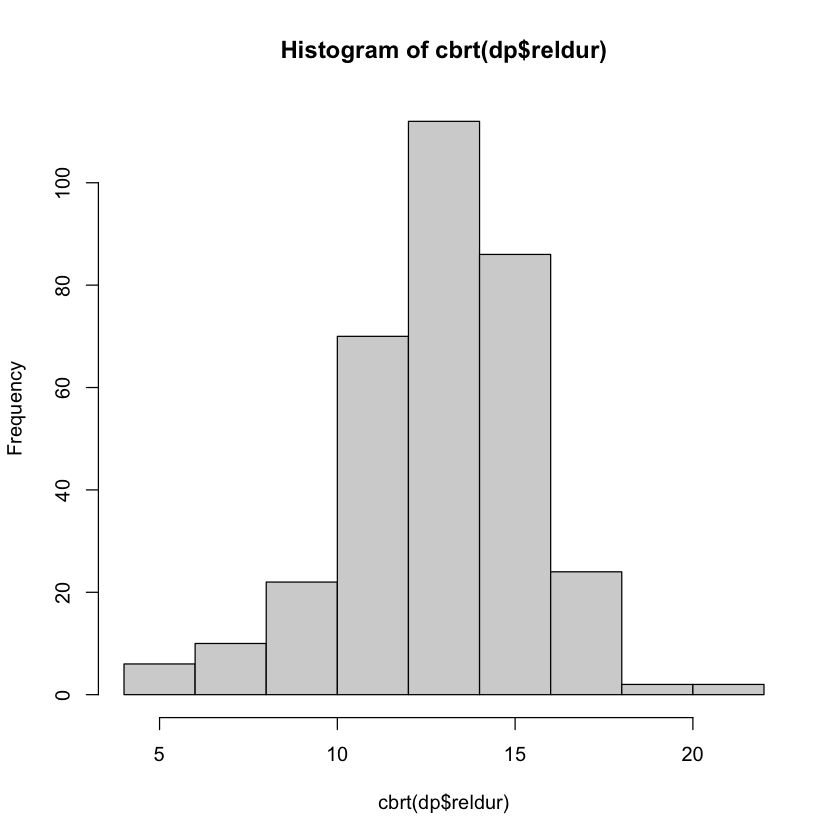

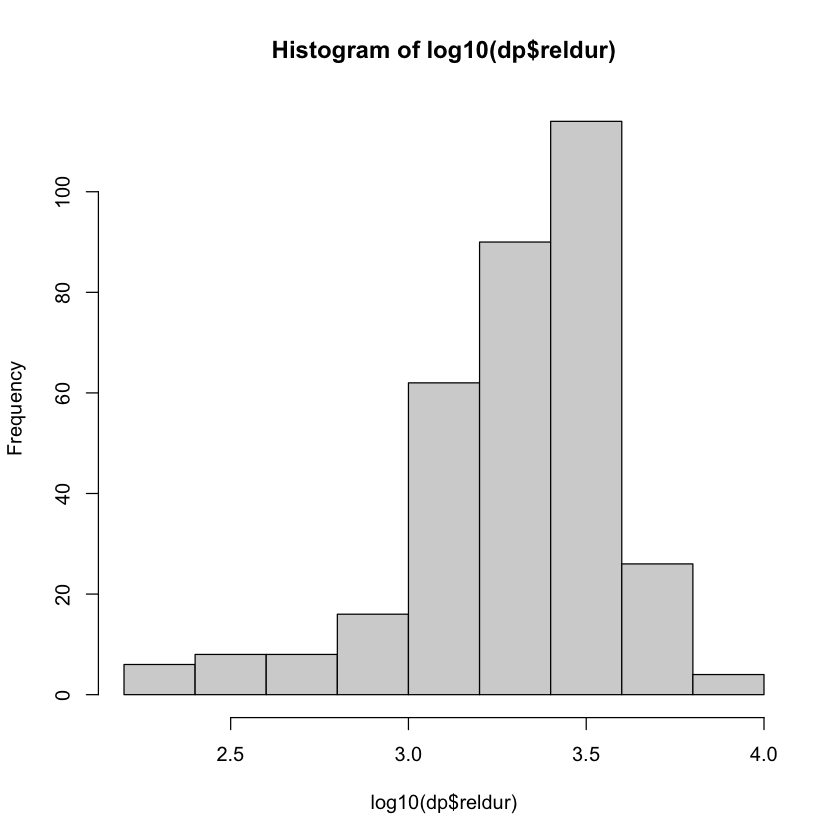

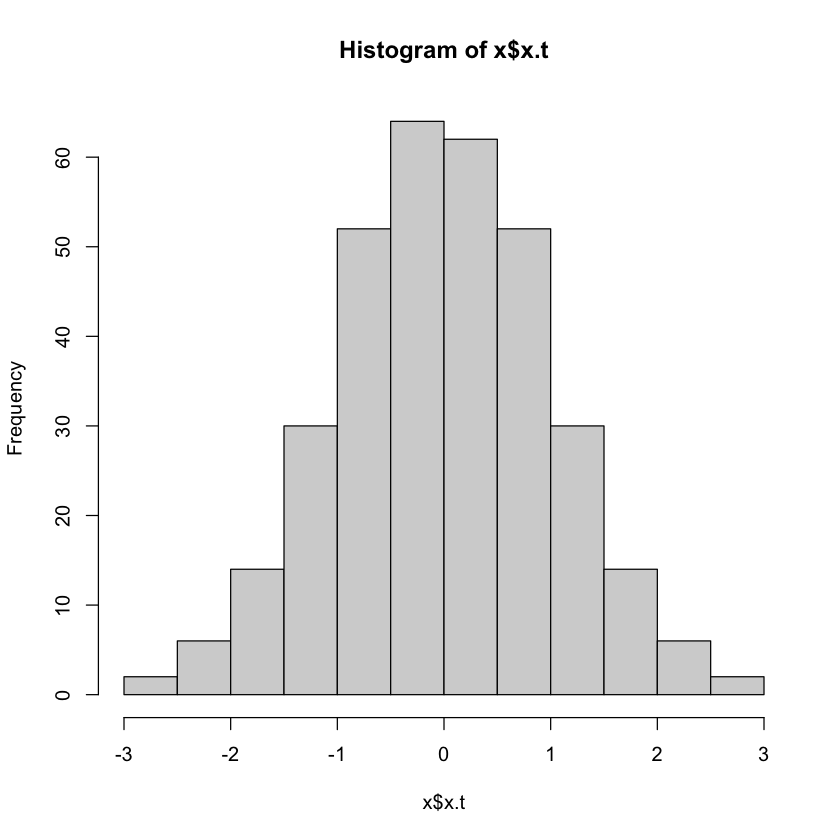

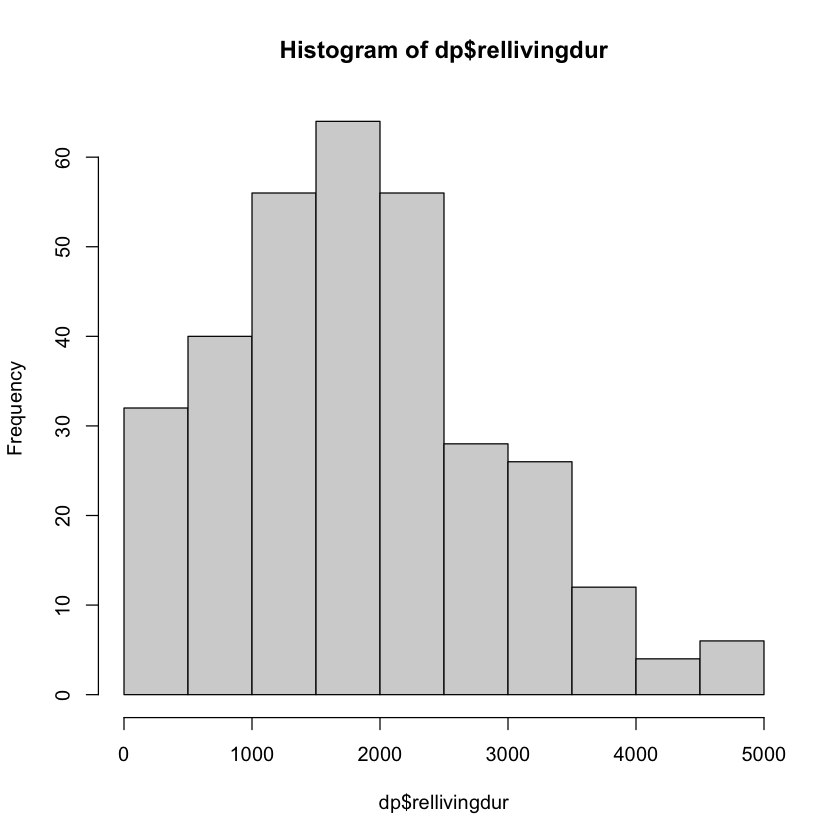

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Loading required package: lme4

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 


Attaching package: ‘lme4’


The following object is masked from ‘package:nlme’:

    lmList


Loading required package: parallel



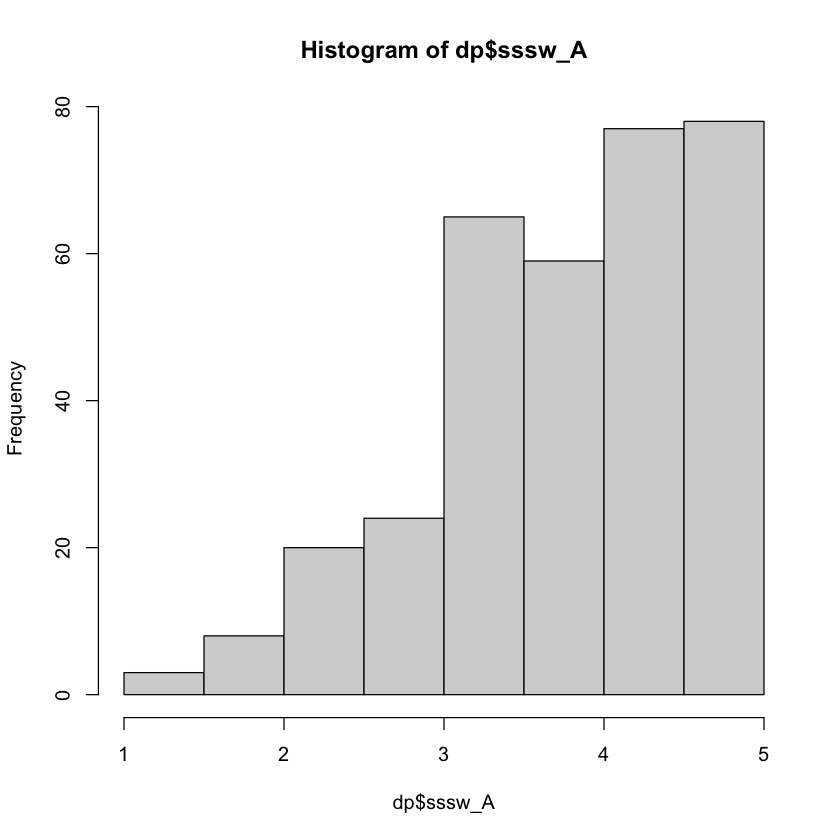

In [1]:
library(tidyverse)
par(bg="white")
source("read_porno.R")
library("car")
library(tidyverse)
library(predictmeans)

In [5]:
library(readxl)

In [12]:
sel = unique(dp$id)

In [72]:
a = read_csv("data/porno_processed_long.csv")
a$sex = factor(a$sex,levels = c(-1, 1), labels = c('Female','Male'))


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  rellivingstart = col_date(format = ""),
  relstart = col_date(format = ""),
  porn3a = col_time(format = ""),
  porn3b = col_time(format = ""),
  porn5a = col_time(format = ""),
  porn5b = col_time(format = ""),
  pornfluence = col_character()
)
ℹ Use `spec()` for the full column specifications.




In [79]:
a = a %>% filter(id %in% sel)
women = a %>% filter(sex == 'Female')
men =  a %>% filter(sex == 'Male')

In [80]:
reg_sssw <- "^sssw.*\\d+$"  
reg_pornuse <- "^pornuse.*\\d+$"
reg_use <- "^use.*\\d+$"
reg_pci <- "^pci.*\\d+$"
reg_views <- "^views.*\\d+$"
regs <- c(reg_sssw, reg_pornuse,reg_use,reg_pci,reg_views) %>% set_names(c("sssw", "pornuse","pornomoral","pci","views"))

In [95]:
items <- 
  map_df(regs, ~ 
            a%>% 
            select(dplyr::matches(.x)) %>% 
             psych::alpha(., check.keys=TRUE) %>% .$alpha.drop
         # capture the name of the regex that is now using
         ,.id = "scale"
  )

items_men <- 
  map_df(regs, ~ 
            men %>% 
            select(dplyr::matches(.x)) %>% 
             psych::alpha(., check.keys=TRUE) %>% .$alpha.drop
         # capture the name of the regex that is now using
         ,.id = "scale"
  )
items_women <- 
  map_df(regs, ~ 
            men %>% 
            select(dplyr::matches(.x)) %>% 
             psych::alpha(., check.keys=TRUE) %>% .$alpha.drop
         # capture the name of the regex that is now using
         ,.id = "scale"
  ) 

Warning message in psych::alpha(., check.keys = TRUE):
“Some items were negatively correlated with total scale and were automatically reversed.
 This is indicated by a negative sign for the variable name.”
Warning message in psych::alpha(., check.keys = TRUE):
“Some items were negatively correlated with total scale and were automatically reversed.
 This is indicated by a negative sign for the variable name.”
Warning message in psych::alpha(., check.keys = TRUE):
“Some items were negatively correlated with total scale and were automatically reversed.
 This is indicated by a negative sign for the variable name.”
Warning message in psych::alpha(., check.keys = TRUE):
“Some items were negatively correlated with total scale and were automatically reversed.
 This is indicated by a negative sign for the variable name.”
Warning message in psych::alpha(., check.keys = TRUE):
“Some items were negatively correlated with total scale and were automatically reversed.
 This is indicated by a negative

In [96]:
items

,scale,raw_alpha,std.alpha,G6(smc),average_r,S/N,alpha se,var.r,med.r
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sssw1-,sssw,0.9337525,0.9331173,0.9440651,0.49913341,13.9515552,0.005227224,0.01567829,0.48135622
sssw10,sssw,0.9327120,0.9323032,0.9448428,0.49589074,13.7717570,0.005319688,0.01516151,0.48207545
sssw11,sssw,0.9320657,0.9317214,0.9436058,0.49359527,13.6458710,0.005371510,0.01400244,0.47665343
sssw12,sssw,0.9308630,0.9304848,0.9415915,0.48877774,13.3853492,0.005464856,0.01322893,0.47665343
sssw13,sssw,0.9295631,0.9292549,0.9409488,0.48406618,13.1352631,0.005578042,0.01238432,0.47158058
sssw14,sssw,0.9333536,0.9329469,0.9447782,0.49845156,13.9135553,0.005263862,0.01497148,0.48207545
sssw15,sssw,0.9310636,0.9306392,0.9425004,0.48937462,13.4173605,0.005447894,0.01348545,0.47665343
sssw2,sssw,0.9322719,0.9318767,0.9433163,0.49420618,13.6792625,0.005349121,0.01485837,0.47665343
sssw3,sssw,0.9336006,0.9329918,0.9437409,0.49863100,13.9235455,0.005243608,0.01473666,0.47940837


In [83]:
alpha <- 
    map_df(regs, ~ 
             a %>% 
             select(dplyr::matches(.x))  %>%
             psych::alpha(., check.keys=TRUE) %>% .$total,
           .id = "scale"
)

alpha_men <- 
    map_df(regs, ~ 
             men %>% 
             select(dplyr::matches(.x))  %>%
             psych::alpha(., check.keys=TRUE) %>% .$total,
           .id = "scale"
)

alpha_women <- 
    map_df(regs, ~ 
             women %>% 
             select(dplyr::matches(.x))  %>%
             psych::alpha(., check.keys=TRUE) %>% .$total,
           .id = "scale"
)

Warning message in psych::alpha(., check.keys = TRUE):
“Some items were negatively correlated with total scale and were automatically reversed.
 This is indicated by a negative sign for the variable name.”
Warning message in psych::alpha(., check.keys = TRUE):
“Some items were negatively correlated with total scale and were automatically reversed.
 This is indicated by a negative sign for the variable name.”
Warning message in psych::alpha(., check.keys = TRUE):
“Some items were negatively correlated with total scale and were automatically reversed.
 This is indicated by a negative sign for the variable name.”
Warning message in psych::alpha(., check.keys = TRUE):
“Some items were negatively correlated with total scale and were automatically reversed.
 This is indicated by a negative sign for the variable name.”
Warning message in psych::alpha(., check.keys = TRUE):
“Some items were negatively correlated with total scale and were automatically reversed.
 This is indicated by a negative

In [98]:
alpha

,scale,raw_alpha,std.alpha,G6(smc),average_r,S/N,ase,mean,sd,median_r
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
...1,sssw,0.9377300,0.9373093,0.9486380,0.4991874,14.951326,0.004903430,2.180439,0.8489782,0.4820755
...2,pornuse,0.8155000,0.8133576,0.8946031,0.3262383,4.357839,0.015365518,2.187292,0.9450231,0.2428006
...3,pornomoral,0.5724562,0.5951771,0.8079298,0.2272283,1.470216,0.028860654,2.694839,0.3758561,0.3116459
...4,pci,0.9420059,0.9424928,0.9663286,0.5221273,16.389115,0.004809847,2.786237,0.9938233,0.5138942
...5,views,0.5534653,0.5535563,0.5657497,0.1987082,1.239924,0.038809206,2.930539,0.7523108,0.1763446


In [99]:
alpha_men

,scale,raw_alpha,std.alpha,G6(smc),average_r,S/N,ase,mean,sd,median_r
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
...1,sssw,0.9496849,0.9490278,0.9592545,0.5538178,18.618550,0.005549955,2.167265,0.8877832,0.5574450
...2,pornuse,0.8125265,0.8106850,0.8992104,0.3224015,4.282201,0.022636397,2.096806,0.8757599,0.2463562
...3,pornomoral,0.4838182,0.5244903,0.7586625,0.1807317,1.103007,0.050974856,2.620126,0.3487373,0.2197253
...4,pci,0.9402425,0.9402021,0.9655453,0.5117662,15.722984,0.006938848,3.031447,0.9557822,0.5110725
...5,views,0.5732073,0.5759006,0.5853171,0.2135815,1.357938,0.052453286,3.020359,0.7638314,0.1971393


In [100]:
alpha_women

,scale,raw_alpha,std.alpha,G6(smc),average_r,S/N,ase,mean,sd,median_r
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
...1,sssw,0.9260549,0.9257411,0.9440114,0.4538784,12.466408,0.008229585,2.193613,0.8107786,0.4393724
...2,pornuse,0.8264749,0.8263183,0.9015950,0.3458190,4.757660,0.019545759,2.277778,1.0040358,0.2943627
...3,pornomoral,0.6369483,0.6485794,0.8459668,0.2696031,1.845593,0.034058925,2.773510,0.3882786,0.3713070
...4,pci,0.9362919,0.9373835,0.9665333,0.4995035,14.970241,0.007484419,2.528035,0.9703309,0.5146449
...5,views,0.5288293,0.5247185,0.5452723,0.1808672,1.104016,0.057821895,2.840719,0.7319026,0.1396252
